<a href="https://colab.research.google.com/github/jung0228/ML/blob/main/%EC%A3%BC%EC%8B%9D%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd 
import seaborn as sns  
import numpy as np
import sklearn
import sklearn.preprocessing
import tensorflow as tf

In [33]:
#해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.
#다운로드와 동시에 Pandas에 excel 파일이 load가 되는 구조입니다.
stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
#stock_code.head()

# 데이터에서 정렬이 따로 필요하지는 않지만 테스트겸 Pandas sort_values를 이용하여 정렬을 시도해봅니다.
stock_code.sort_values(['상장일'], ascending=True)

# 필요한 것은 "회사명"과 "종목코드" 이므로 필요없는 column들은 제외
stock_code = stock_code[['회사명', '종목코드']] 

# 한글 컬럼명을 영어로 변경 
stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
#stock_code.head()

# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
stock_code.code = stock_code.code.map('{:06d}'.format) 

In [ ]:
import requests

# LG화학의 일별 시세 url 가져오기 

# LG화학의 일별 시세 url 가져오기 
company='LG화학' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
page = 1

url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
url = '{url}&page={page}'.format(url=url, page=page)
print(url)
header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  

res = requests.get(url,headers=header)
df = pd.read_html(res.text, header=0)[0]
df.head()

http://finance.naver.com/item/sise_day.nhn?code=051910&page=1


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.02.04,678000.0,1000.0,680000.0,687000.0,668000.0,217418.0
2,2022.02.03,677000.0,38000.0,677000.0,691000.0,661000.0,356414.0
3,2022.01.28,639000.0,29000.0,628000.0,643000.0,622000.0,528869.0
4,2022.01.27,610000.0,54000.0,644000.0,669000.0,605000.0,882032.0


In [256]:
company='LG화학' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거

df = pd.DataFrame()
for page in range(1,51):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    print(url)
    header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  
    res = requests.get(url,headers=header)
    df = df.append(pd.read_html(res.text, header=0)[0])

http://finance.naver.com/item/sise_day.nhn?code=051910&page=1
http://finance.naver.com/item/sise_day.nhn?code=051910&page=2
http://finance.naver.com/item/sise_day.nhn?code=051910&page=3
http://finance.naver.com/item/sise_day.nhn?code=051910&page=4
http://finance.naver.com/item/sise_day.nhn?code=051910&page=5
http://finance.naver.com/item/sise_day.nhn?code=051910&page=6
http://finance.naver.com/item/sise_day.nhn?code=051910&page=7
http://finance.naver.com/item/sise_day.nhn?code=051910&page=8
http://finance.naver.com/item/sise_day.nhn?code=051910&page=9
http://finance.naver.com/item/sise_day.nhn?code=051910&page=10
http://finance.naver.com/item/sise_day.nhn?code=051910&page=11
http://finance.naver.com/item/sise_day.nhn?code=051910&page=12
http://finance.naver.com/item/sise_day.nhn?code=051910&page=13
http://finance.naver.com/item/sise_day.nhn?code=051910&page=14
http://finance.naver.com/item/sise_day.nhn?code=051910&page=15
http://finance.naver.com/item/sise_day.nhn?code=051910&page=16
h

In [257]:
df_save = df.copy()

이 아래로 반복해서 쓰삼

In [258]:
df = df_save
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.02.04,678000.0,1000.0,680000.0,687000.0,668000.0,217418.0
2,2022.02.03,677000.0,38000.0,677000.0,691000.0,661000.0,356414.0
3,2022.01.28,639000.0,29000.0,628000.0,643000.0,622000.0,528869.0
4,2022.01.27,610000.0,54000.0,644000.0,669000.0,605000.0,882032.0
...,...,...,...,...,...,...,...
10,2020.02.04,379500.0,29500.0,364500.0,385000.0,361500.0,995237.0
11,2020.02.03,350000.0,12500.0,328500.0,351500.0,325500.0,594448.0
12,2020.01.31,337500.0,6000.0,349000.0,354000.0,335000.0,391298.0
13,2020.01.30,343500.0,8500.0,338500.0,347500.0,338500.0,642288.0


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 14
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      500 non-null    object 
 1   종가      500 non-null    float64
 2   전일비     500 non-null    float64
 3   시가      500 non-null    float64
 4   고가      500 non-null    float64
 5   저가      500 non-null    float64
 6   거래량     500 non-null    float64
dtypes: float64(6), object(1)
memory usage: 46.9+ KB


In [286]:
# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
# df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=True) 

# 상위 5개 데이터 확인 
df[0:5]


,date,close,diff,open,high,low,volume
13,2020-01-30,343500,8500,338500,347500,338500,642288
12,2020-01-31,337500,6000,349000,354000,335000,391298
11,2020-02-03,350000,12500,328500,351500,325500,594448
10,2020-02-04,379500,29500,364500,385000,361500,995237
9,2020-02-05,382000,2500,391000,391500,377000,731711


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 13 to 1
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    500 non-null    datetime64[ns]
 1   close   500 non-null    int64         
 2   diff    500 non-null    int64         
 3   open    500 non-null    int64         
 4   high    500 non-null    int64         
 5   low     500 non-null    int64         
 6   volume  500 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 31.2 KB


In [288]:
import matplotlib.pyplot as plt
# 필요한 모듈 import 하기 
import plotly
import plotly.graph_objects as go
import plotly.express as px

# %matplotlib inline 은 jupyter notebook 사용자용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline 

In [289]:
df.columns

Index(['date', 'close', 'diff', 'open', 'high', 'low', 'volume'], dtype='object')

In [290]:
corr = df.corr()
print(corr['close'])

close     1.000000
diff      0.187936
open      0.996227
high      0.998423
low       0.998384
volume   -0.280474
Name: close, dtype: float64


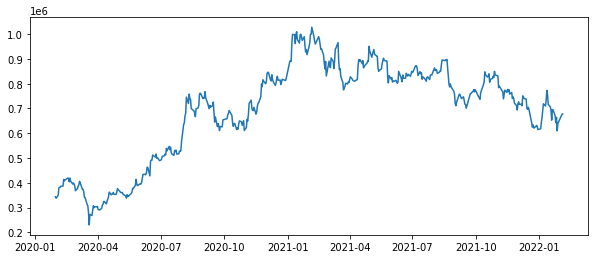

In [291]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])

In [292]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    #print(data_raw)
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])

    valid_set_size_percentage = 10
    test_set_size_percentage = 10

    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [293]:
# choose one stock
import warnings
warnings.filterwarnings(action = 'ignore')
df_stock = df.copy()
df_stock.drop(['volume'],1,inplace=True)
df_stock.drop(['diff'],1,inplace=True)
df_stock.drop(['date'],1,inplace=True)


cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['close', 'open', 'high', 'low']
x_train.shape =  (384, 19, 4)
y_train.shape =  (384, 4)
x_valid.shape =  (48, 19, 4)
y_valid.shape =  (48, 4)
x_test.shape =  (48, 19, 4)
y_test.shape =  (48, 4)


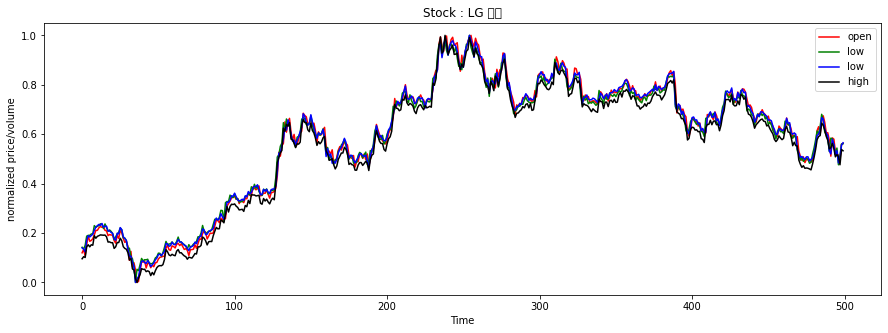

In [294]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('Stock : LG 화학') 
plt.xlabel('Time') 
plt.ylabel('normalized price/volume') 
plt.legend(loc='best') 
plt.show() 

In [295]:
tf.config.run_functions_eagerly(True)

index_in_epoch = 0;
#np.arange(3) => array([0, 1, 2])
perm_array  = np.arange(x_train.shape[0])
#섞어
np.random.shuffle(perm_array)
print(x_train.shape[0])

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   # 전역 변수를 쓰겠다.
    start = index_in_epoch                  # 배치의 시작은 인덱스 에서 시작
    index_in_epoch += batch_size            # 배치 사이즈 만큼 인덱스 증가
    
    if index_in_epoch > x_train.shape[0]:   # 인덱스가 275 보다 크다면
        np.random.shuffle(perm_array)       # shuffle permutation array
        start = 0                           # start next epoch
        index_in_epoch = batch_size         # 배치는 배치 사이즈 만큼의 크기에서 시작함
        
    end = index_in_epoch                    # 배치의 끝은 인덱스
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]  # x_train, y_train 리턴해주는 데 start에서 end까지

384


In [296]:
# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4 
n_layers = 2 
learning_rate = 0.001 
batch_size = 50 
n_epochs = 100 
train_set_size = x_train.shape[0] 
test_set_size = x_test.shape[0] 

In [297]:
tf.compat.v1.reset_default_graph() 
tf.compat.v1.disable_eager_execution() # 활성 함수 (?) 
# 인풋이 X 
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs]) #자리를 공급...? 무엇에 대한 자리지? 
# 아웃풋이 y 
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs]) 

# use Basic RNN Cell 
layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu) 
          for layer in range(n_layers)]  
# 뉴런 수 : 200개, 활성함수 : tf.nn.elu (ReLu 비슷한 것임) <= 레이어 수만큼 반복 


multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers) #만든 레이어들을 MultiRNNCell
# RNNCell cell 로 지정된 반복 신경 네트워크를 만듭니다 .
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence

In [298]:
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.compat.v1.train.AdamOptimizer(
    learning_rate=0.001, 
    name='Adam'
)
training_op = optimizer.minimize(loss)
# The first step is `-learning_rate*sign(grad)`
# run graph

In [299]:
with tf.compat.v1.Session() as sess: 
    sess.run(tf.compat.v1.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.501473/0.610258
4.95 epochs: MSE train/valid = 0.001716/0.001138
9.90 epochs: MSE train/valid = 0.001343/0.000980
14.84 epochs: MSE train/valid = 0.001215/0.000968
19.79 epochs: MSE train/valid = 0.001041/0.000882
24.74 epochs: MSE train/valid = 0.000941/0.000821
29.69 epochs: MSE train/valid = 0.000979/0.000799
34.64 epochs: MSE train/valid = 0.000890/0.000733
39.58 epochs: MSE train/valid = 0.000845/0.000716
44.53 epochs: MSE train/valid = 0.000825/0.000761
49.48 epochs: MSE train/valid = 0.000812/0.000680
54.43 epochs: MSE train/valid = 0.000889/0.000850
59.38 epochs: MSE train/valid = 0.000753/0.000614
64.32 epochs: MSE train/valid = 0.000751/0.000763
69.27 epochs: MSE train/valid = 0.000767/0.000809
74.22 epochs: MSE train/valid = 0.000699/0.000601
79.17 epochs: MSE train/valid = 0.000692/0.000599
84.11 epochs: MSE train/valid = 0.000574/0.000503
89.06 epochs: MSE train/valid = 0.000548/0.000511
94.01 epochs: MSE train/valid = 0.000594/0.000541
98.

correct sign prediction for close - open price for train/valid/test: 0.73/0.65/0.69


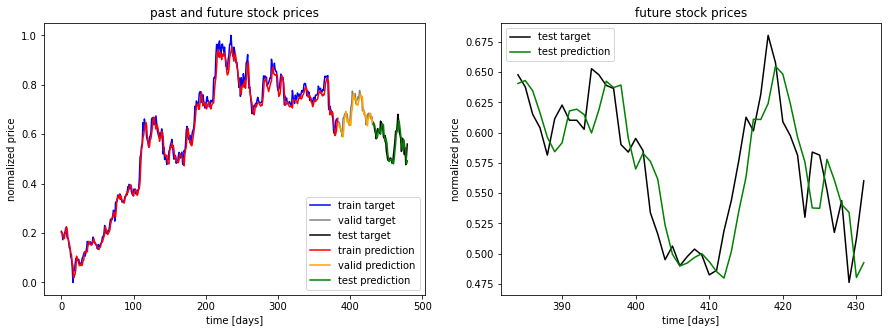

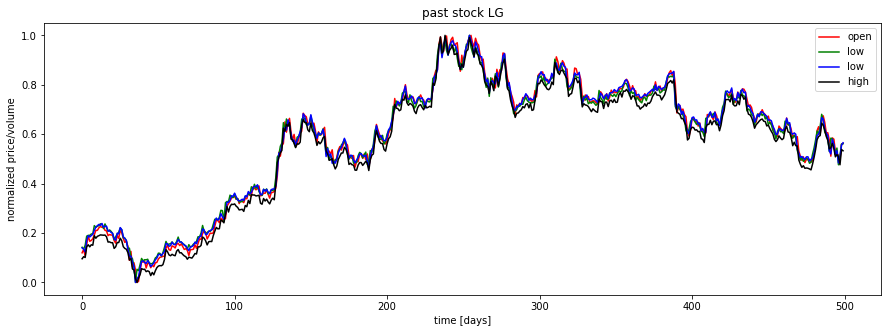

In [300]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

# 과거의 데이터
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('past stock LG')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [301]:
#삼전 코드 :005930

company='삼성전자' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
page = 1

url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
url = '{url}&page={page}'.format(url=url, page=page)
print(url)
header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  

res = requests.get(url,headers=header)
df = pd.read_html(res.text, header=0)[0]
df.head()

http://finance.naver.com/item/sise_day.nhn?code=005930&page=1


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.02.04,74000.0,700.0,74300.0,74600.0,73400.0,12375640.0
2,2022.02.03,73300.0,0.0,74900.0,74900.0,73300.0,17744721.0
3,2022.01.28,73300.0,2000.0,71300.0,73700.0,71200.0,21367447.0
4,2022.01.27,71300.0,2000.0,73800.0,74000.0,71300.0,22274777.0


In [302]:
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거

df = pd.DataFrame()
for page in range(1,51):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    print(url)
    header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  
    res = requests.get(url,headers=header)
    df = df.append(pd.read_html(res.text, header=0)[0])

In [303]:
# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=False) 



In [304]:
df['time_epoch'] = (df['date'].astype(np.int64)/100000000000).astype(np.int64)

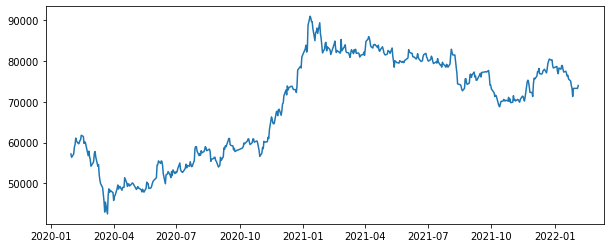

In [305]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])

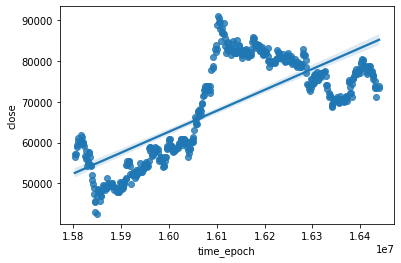

In [306]:
sns.regplot(x='time_epoch', y='close', data=df)